### DIGIT RECOGNITION DEEP LEARNING PROJECT

In [1]:
## Loading required libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import pandas as pd

### Load the mnist dataset to train the models

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

### Visualizing the Image Data

#### According to the documentation, each digit image is encased in a 28x28 matrix.  Each cell in the matrix has a grayscale pixel value. 

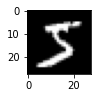

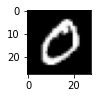

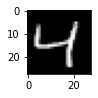

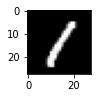

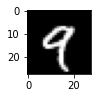

In [8]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))    
    plt.show()

### Visualizing the Training Data

In [9]:
### Understading the training data
ytrain_df = pd.DataFrame(y_train, columns=["digit"])
ytrain_df.describe()

,digit
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [10]:
digit_group = ytrain_df.groupby('digit')
digit_count = digit_group["digit"].count()
digit_count_df = pd.DataFrame(digit_count)
digit_count_df = digit_count_df.rename(columns={"digit":"frequency"})
all_ytrain = 60000
digit_count_df['pc_total']=digit_count_df['frequency']/all_ytrain*100
digit_count_df = digit_count_df.reset_index()
digit_count_df

,digit,frequency,pc_total
0,0,5923,9.871667
1,1,6742,11.236667
2,2,5958,9.930000
3,3,6131,10.218333
4,4,5842,9.736667
5,5,5421,9.035000
6,6,5918,9.863333
7,7,6265,10.441667
8,8,5851,9.751667
9,9,5949,9.915000


([<matplotlib.axis.XTick at 0x25afa32dbe0>,
 [Text(-2.0, 0, '0'),
  Text(0.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '3'),
  Text(6.0, 0, '4'),
  Text(8.0, 0, '5'),
  Text(10.0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9')])

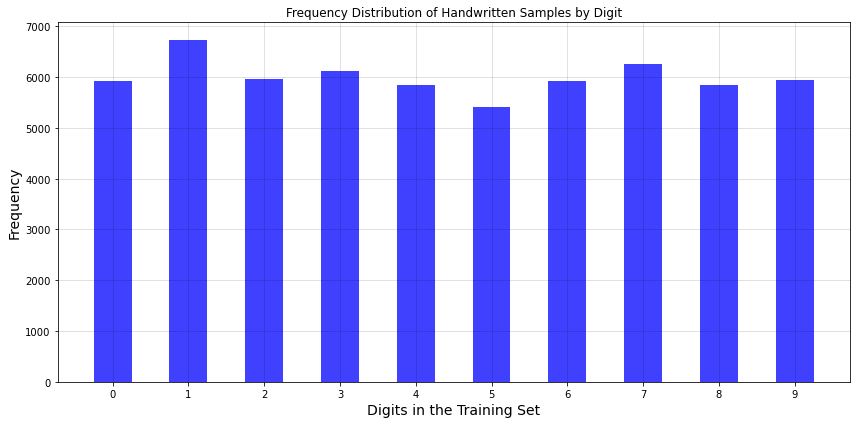

In [11]:
# Visualizing the training data

x_axis = digit_count_df['digit']
y_values = digit_count_df['frequency']
fig1 = plt.figure(figsize = (12,6))

plt.bar(x_axis, y_values, color = 'b', alpha = 0.75, align = "center", width = 0.5)

plt.title("Frequency Distribution of Handwritten Samples by Digit")
plt.xlabel("Digits in the Training Set", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.grid(color='k', alpha = 0.15)
plt.tight_layout()

x_axis = np.arange(len(digit_count_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, digit_count_df['digit'], rotation=False)


#### The data visualization demonstrates an equitable distribution of samples across all the 10 digits.

## Normalizing the attribute data

In [12]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

### Define the Model

#### The model consists of one input layer, two hidden or dense layers, and one output layer

In [13]:
model = tf.keras.models.Sequential()

In [14]:
### This layer takes the two dimensional 28x28 and makes it one dimensional 784 columns
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [15]:
### This layer is the rectified linear activation function.  This is the preferred activation method for image detection.
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))

In [16]:
### Adding a second dense layer
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))

In [17]:
### Adding the output layer with one end point per digit.
### The softmax activation scales the output of the layers so that the sum of all the outputs add up to 1.
### One can think this like a probability distribution per digit.
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

### Compiling and Fitting the Model

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 1ms/step - loss: 0.2229 - accuracy: 0.9341
Epoch 2/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0899 - accuracy: 0.9712
Epoch 3/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0593 - accuracy: 0.9812
Epoch 4/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0422 - accuracy: 0.9863


### Evaluating the Model Accuracy and Loss

In [20]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0775 - accuracy: 0.9767


In [21]:
print('Accuracy=',accuracy)
print('Loss =', loss)

Accuracy= 0.9767000079154968
Loss = 0.07751821726560593


### MODEL HAS A >97% ACCURACY

### SAVING THE MODEL

In [22]:
model.save("hwdigit.model")

INFO:tensorflow:Assets written to: hwdigit.model\assets


### TESTING THE MODEL WITH DIGITS DRAWN IN PAINT

Model Predictions: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Model predicts this image to be a 1


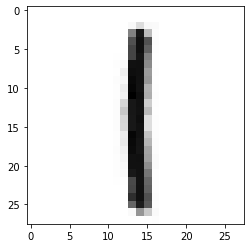

Model Predictions: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Model predicts this image to be a 2


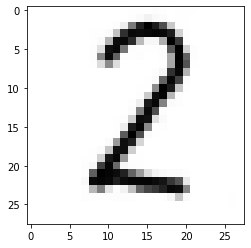

Model Predictions: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Model predicts this image to be a 3


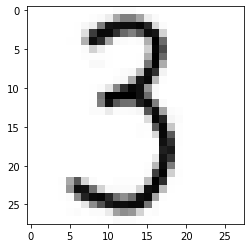

Model Predictions: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Model predicts this image to be a 4


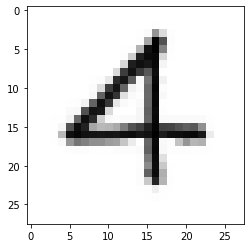

Model Predictions: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Model predicts this image to be a 5


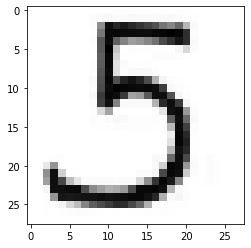

Model Predictions: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Model predicts this image to be a 6


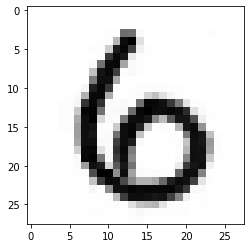

Model Predictions: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Model predicts this image to be a 1


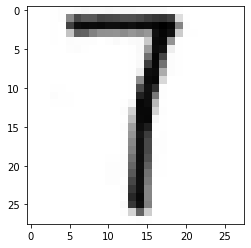

Model Predictions: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Model predicts this image to be a 3


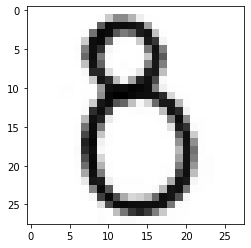

Model Predictions: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Model predicts this image to be a 3


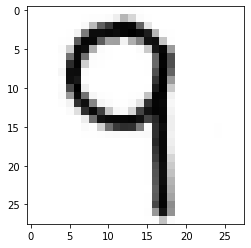

Model Predictions: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Model predicts this image to be a 0


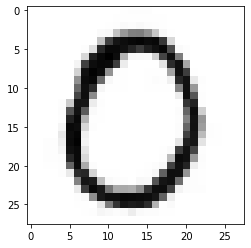

In [23]:
for x in range(1,11):
    img = cv.imread(f'{x}.png')[:,:,0]                    
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    
    print(f'Model Predictions:', prediction)
    print(f'Model predicts this image to be a {np.argmax(prediction)}')
    
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()

##### END OF PROJECT